In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, SimpleRNN
from keras.layers import Dropout
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

In [127]:
df = pd.read_csv('traindata.csv')
print(df)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1258 rows x 6 columns]


In [128]:
df["Close"]=pd.to_numeric(df.Close,errors='coerce')
df = df.dropna()
print(df)

            Date    Open    High     Low   Close      Volume
0       1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1       1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2       1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3       1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4       1/9/2012  322.04  322.29  309.46  620.76  11,688,800
...          ...     ...     ...     ...     ...         ...
1253  12/23/2016  790.90  792.74  787.28  789.91     623,400
1254  12/27/2016  790.68  797.86  787.66  791.55     789,100
1255  12/28/2016  793.70  794.23  783.20  785.05   1,153,800
1256  12/29/2016  783.33  785.93  778.92  782.79     744,300
1257  12/30/2016  782.75  782.78  770.41  771.82   1,770,000

[1149 rows x 6 columns]


In [129]:
training_set = df.iloc[:,4:5].values

In [130]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled.shape

(1149, 1)

In [131]:
X_train = []
y_train = []
for i in range(60, 1149):
  X_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [132]:
print(X_train.shape)
print(y_train.shape)

(1089, 60, 1)
(1089,)


In [134]:
testData = pd.read_csv('googletest.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()

In [135]:
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 

In [136]:
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape

(252, 1)

In [137]:
X_test = []
for i in range(60,len(testData)): 
    X_test.append(inputClosing_scaled[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

## LSTM models:

## Assuming to be default settings.

In [139]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 15s - loss: 0.0367 - accuracy: 0.0018 - val_loss: 1265549.1250 - val_accuracy: 0.0000e+00 - 15s/epoch - 433ms/step
Epoch 2/25
35/35 - 5s - loss: 0.0143 - accuracy: 0.0018 - val_loss: 1265636.0000 - val_accuracy: 0.0000e+00 - 5s/epoch - 130ms/step
Epoch 3/25
35/35 - 5s - loss: 0.0118 - accuracy: 0.0018 - val_loss: 1266020.0000 - val_accuracy: 0.0000e+00 - 5s/epoch - 130ms/step
Epoch 4/25
35/35 - 5s - loss: 0.0134 - accuracy: 0.0018 - val_loss: 1265456.8750 - val_accuracy: 0.0000e+00 - 5s/epoch - 131ms/step
Epoch 5/25
35/35 - 4s - loss: 0.0104 - accuracy: 0.0018 - val_loss: 1265543.0000 - val_accuracy: 0.0000e+00 - 4s/epoch - 126ms/step
Epoch 6/25
35/35 - 4s - loss: 0.0093 - accuracy: 0.0018 - val_loss: 1265717.5000 - val_accuracy: 0.0000e+00 - 4s/epoch - 125ms/step
Epoch 7/25
35/35 - 4s - loss: 0.0096 - accuracy: 0.0018 - val_loss: 1265706.0000 - val_accuracy: 0.0000e+00 - 4s/epoch - 127ms/step
Epoch 8/25
35/35 - 4s - loss: 0.0083 - accuracy: 0.0018 - val_loss: 126561

In [140]:
y_pred = model.predict(X_test)

In [141]:
predicted_price = sc.inverse_transform(y_pred)

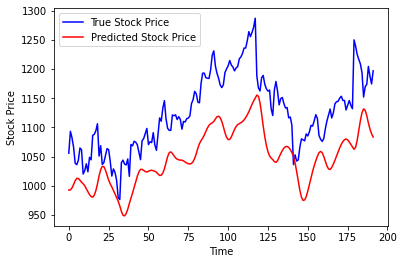

In [142]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

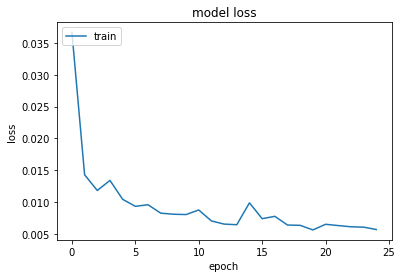

In [143]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Tuning the no of epochs

## Increasing the epochs.

In [150]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/30
35/35 - 17s - loss: 0.0473 - accuracy: 0.0018 - val_loss: 1265222.8750 - val_accuracy: 0.0000e+00 - 17s/epoch - 485ms/step
Epoch 2/30
35/35 - 5s - loss: 0.0178 - accuracy: 0.0018 - val_loss: 1265291.3750 - val_accuracy: 0.0000e+00 - 5s/epoch - 142ms/step
Epoch 3/30
35/35 - 7s - loss: 0.0116 - accuracy: 0.0018 - val_loss: 1265588.7500 - val_accuracy: 0.0000e+00 - 7s/epoch - 194ms/step
Epoch 4/30
35/35 - 6s - loss: 0.0115 - accuracy: 0.0018 - val_loss: 1265157.0000 - val_accuracy: 0.0000e+00 - 6s/epoch - 176ms/step
Epoch 5/30
35/35 - 7s - loss: 0.0138 - accuracy: 0.0018 - val_loss: 1265576.8750 - val_accuracy: 0.0000e+00 - 7s/epoch - 187ms/step
Epoch 6/30
35/35 - 8s - loss: 0.0092 - accuracy: 0.0018 - val_loss: 1265770.3750 - val_accuracy: 0.0000e+00 - 8s/epoch - 218ms/step
Epoch 7/30
35/35 - 9s - loss: 0.0084 - accuracy: 0.0018 - val_loss: 1265612.1250 - val_accuracy: 0.0000e+00 - 9s/epoch - 251ms/step
Epoch 8/30
35/35 - 7s - loss: 0.0082 - accuracy: 0.0018 - val_loss: 126569

In [151]:
y_pred = model.predict(X_test)

In [152]:
predicted_price = sc.inverse_transform(y_pred)

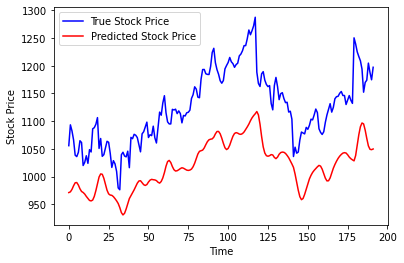

In [153]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

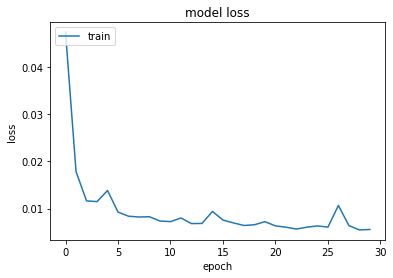

In [154]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Decreasing the no. of epochs  

In [155]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/15
35/35 - 17s - loss: 0.0471 - accuracy: 0.0018 - val_loss: 1265501.8750 - val_accuracy: 0.0000e+00 - 17s/epoch - 473ms/step
Epoch 2/15
35/35 - 5s - loss: 0.0138 - accuracy: 0.0018 - val_loss: 1265556.8750 - val_accuracy: 0.0000e+00 - 5s/epoch - 142ms/step
Epoch 3/15
35/35 - 5s - loss: 0.0124 - accuracy: 0.0018 - val_loss: 1265886.0000 - val_accuracy: 0.0000e+00 - 5s/epoch - 139ms/step
Epoch 4/15
35/35 - 5s - loss: 0.0113 - accuracy: 0.0018 - val_loss: 1265505.8750 - val_accuracy: 0.0000e+00 - 5s/epoch - 137ms/step
Epoch 5/15
35/35 - 5s - loss: 0.0092 - accuracy: 0.0018 - val_loss: 1265596.1250 - val_accuracy: 0.0000e+00 - 5s/epoch - 137ms/step
Epoch 6/15
35/35 - 5s - loss: 0.0097 - accuracy: 0.0018 - val_loss: 1265441.3750 - val_accuracy: 0.0000e+00 - 5s/epoch - 139ms/step
Epoch 7/15
35/35 - 5s - loss: 0.0084 - accuracy: 0.0018 - val_loss: 1265682.1250 - val_accuracy: 0.0000e+00 - 5s/epoch - 138ms/step
Epoch 8/15
35/35 - 5s - loss: 0.0079 - accuracy: 0.0018 - val_loss: 126534

In [156]:
y_pred = model.predict(X_test)

In [157]:
predicted_price = sc.inverse_transform(y_pred)

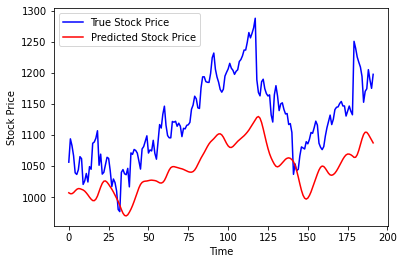

In [158]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

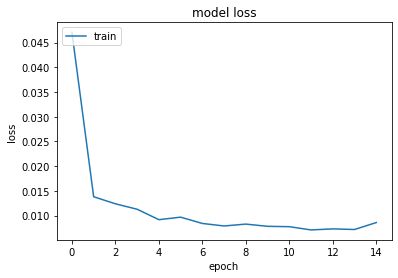

In [159]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Changing the no of nodes in layers:

## Increasing the no of nodes.

In [160]:
model = Sequential()
model.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 19s - loss: 0.0356 - accuracy: 0.0018 - val_loss: 1265188.7500 - val_accuracy: 0.0000e+00 - 19s/epoch - 533ms/step
Epoch 2/25
35/35 - 8s - loss: 0.0118 - accuracy: 0.0018 - val_loss: 1265238.8750 - val_accuracy: 0.0000e+00 - 8s/epoch - 224ms/step
Epoch 3/25
35/35 - 8s - loss: 0.0098 - accuracy: 0.0018 - val_loss: 1265391.3750 - val_accuracy: 0.0000e+00 - 8s/epoch - 228ms/step
Epoch 4/25
35/35 - 8s - loss: 0.0083 - accuracy: 0.0018 - val_loss: 1265499.5000 - val_accuracy: 0.0000e+00 - 8s/epoch - 227ms/step
Epoch 5/25
35/35 - 8s - loss: 0.0071 - accuracy: 0.0018 - val_loss: 1265156.3750 - val_accuracy: 0.0000e+00 - 8s/epoch - 225ms/step
Epoch 6/25
35/35 - 8s - loss: 0.0076 - accuracy: 0.0018 - val_loss: 1264995.8750 - val_accuracy: 0.0000e+00 - 8s/epoch - 227ms/step
Epoch 7/25
35/35 - 8s - loss: 0.0069 - accuracy: 0.0018 - val_loss: 1265486.7500 - val_accuracy: 0.0000e+00 - 8s/epoch - 229ms/step
Epoch 8/25
35/35 - 8s - loss: 0.0068 - accuracy: 0.0018 - val_loss: 126520

In [161]:
y_pred = model.predict(X_test)

In [162]:
predicted_price = sc.inverse_transform(y_pred)

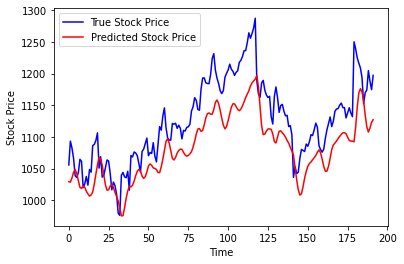

In [163]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

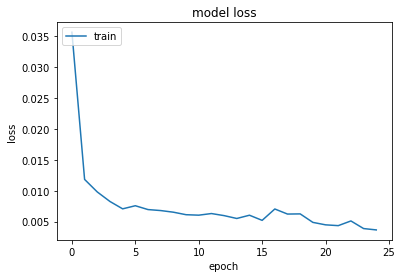

In [164]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Decreasing the no of nodes.

In [215]:
model = Sequential()
model.add(LSTM(units=25,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=25,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=25,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=25))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 12s - loss: 0.0698 - accuracy: 0.0018 - val_loss: 1265863.0000 - val_accuracy: 0.0000e+00 - 12s/epoch - 349ms/step
Epoch 2/25
35/35 - 3s - loss: 0.0175 - accuracy: 0.0018 - val_loss: 1265993.1250 - val_accuracy: 0.0000e+00 - 3s/epoch - 93ms/step
Epoch 3/25
35/35 - 3s - loss: 0.0142 - accuracy: 0.0018 - val_loss: 1265690.6250 - val_accuracy: 0.0000e+00 - 3s/epoch - 94ms/step
Epoch 4/25
35/35 - 3s - loss: 0.0152 - accuracy: 0.0018 - val_loss: 1265833.8750 - val_accuracy: 0.0000e+00 - 3s/epoch - 89ms/step
Epoch 5/25
35/35 - 3s - loss: 0.0122 - accuracy: 0.0018 - val_loss: 1265851.3750 - val_accuracy: 0.0000e+00 - 3s/epoch - 93ms/step
Epoch 6/25
35/35 - 3s - loss: 0.0120 - accuracy: 0.0018 - val_loss: 1265704.2500 - val_accuracy: 0.0000e+00 - 3s/epoch - 96ms/step
Epoch 7/25
35/35 - 3s - loss: 0.0115 - accuracy: 0.0018 - val_loss: 1265791.5000 - val_accuracy: 0.0000e+00 - 3s/epoch - 93ms/step
Epoch 8/25
35/35 - 3s - loss: 0.0121 - accuracy: 0.0018 - val_loss: 1265496.3750

In [216]:
y_pred = model.predict(X_test)

In [217]:
predicted_price = sc.inverse_transform(y_pred)

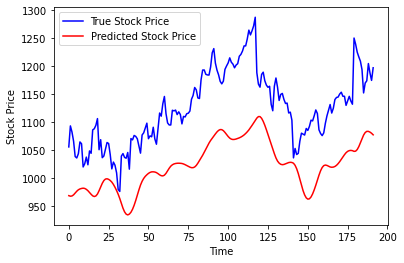

In [218]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

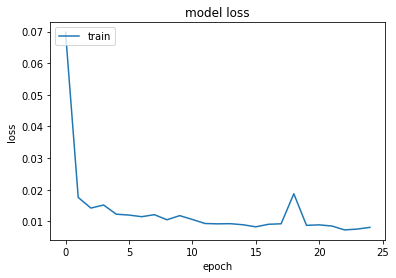

In [219]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Changing the no of layers:

## Increasing the no of layers.

In [170]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 18s - loss: 0.0517 - accuracy: 9.1827e-04 - val_loss: 1265599.0000 - val_accuracy: 0.0000e+00 - 18s/epoch - 516ms/step
Epoch 2/25
35/35 - 6s - loss: 0.0174 - accuracy: 0.0018 - val_loss: 1265753.5000 - val_accuracy: 0.0000e+00 - 6s/epoch - 182ms/step
Epoch 3/25
35/35 - 6s - loss: 0.0128 - accuracy: 0.0018 - val_loss: 1265812.3750 - val_accuracy: 0.0000e+00 - 6s/epoch - 171ms/step
Epoch 4/25
35/35 - 6s - loss: 0.0128 - accuracy: 0.0018 - val_loss: 1265118.0000 - val_accuracy: 0.0000e+00 - 6s/epoch - 160ms/step
Epoch 5/25
35/35 - 6s - loss: 0.0175 - accuracy: 0.0018 - val_loss: 1265779.6250 - val_accuracy: 0.0000e+00 - 6s/epoch - 165ms/step
Epoch 6/25
35/35 - 6s - loss: 0.0105 - accuracy: 0.0018 - val_loss: 1265860.1250 - val_accuracy: 0.0000e+00 - 6s/epoch - 167ms/step
Epoch 7/25
35/35 - 6s - loss: 0.0114 - accuracy: 0.0018 - val_loss: 1265502.6250 - val_accuracy: 0.0000e+00 - 6s/epoch - 163ms/step
Epoch 8/25
35/35 - 6s - loss: 0.0101 - accuracy: 0.0018 - val_loss: 12

In [171]:
y_pred = model.predict(X_test)

In [172]:
predicted_price = sc.inverse_transform(y_pred)

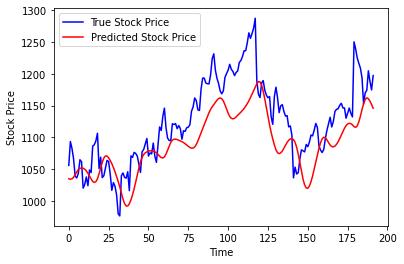

In [173]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

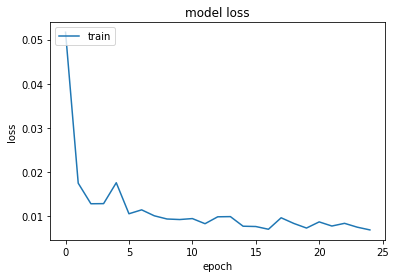

In [174]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Decreasing the no of layers.

In [175]:
model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 11s - loss: 0.0481 - accuracy: 0.0018 - val_loss: 1265715.6250 - val_accuracy: 0.0000e+00 - 11s/epoch - 312ms/step
Epoch 2/25
35/35 - 3s - loss: 0.0106 - accuracy: 0.0018 - val_loss: 1265419.6250 - val_accuracy: 0.0000e+00 - 3s/epoch - 99ms/step
Epoch 3/25
35/35 - 3s - loss: 0.0101 - accuracy: 0.0018 - val_loss: 1265367.3750 - val_accuracy: 0.0000e+00 - 3s/epoch - 100ms/step
Epoch 4/25
35/35 - 3s - loss: 0.0093 - accuracy: 0.0018 - val_loss: 1265352.3750 - val_accuracy: 0.0000e+00 - 3s/epoch - 97ms/step
Epoch 5/25
35/35 - 3s - loss: 0.0085 - accuracy: 0.0018 - val_loss: 1265331.1250 - val_accuracy: 0.0000e+00 - 3s/epoch - 96ms/step
Epoch 6/25
35/35 - 3s - loss: 0.0078 - accuracy: 0.0018 - val_loss: 1265123.7500 - val_accuracy: 0.0000e+00 - 3s/epoch - 95ms/step
Epoch 7/25
35/35 - 3s - loss: 0.0078 - accuracy: 0.0018 - val_loss: 1265582.8750 - val_accuracy: 0.0000e+00 - 3s/epoch - 93ms/step
Epoch 8/25
35/35 - 3s - loss: 0.0074 - accuracy: 0.0018 - val_loss: 1265452.000

In [176]:
y_pred = model.predict(X_test)

In [177]:
predicted_price = sc.inverse_transform(y_pred)

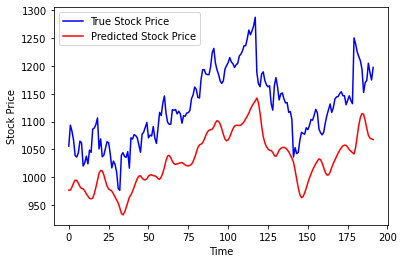

In [178]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

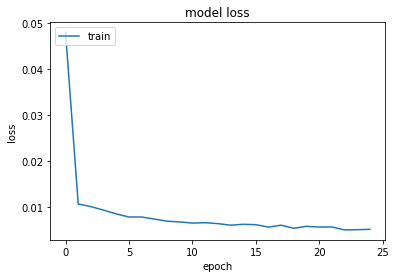

In [179]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## RNN models:

## Assuming to be default settings.

In [180]:
model = Sequential()
model.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 6s - loss: 0.5029 - accuracy: 0.0018 - val_loss: 1266415.6250 - val_accuracy: 0.0000e+00 - 6s/epoch - 170ms/step
Epoch 2/25
35/35 - 2s - loss: 0.3115 - accuracy: 9.1827e-04 - val_loss: 1266346.8750 - val_accuracy: 0.0000e+00 - 2s/epoch - 59ms/step
Epoch 3/25
35/35 - 2s - loss: 0.2400 - accuracy: 0.0018 - val_loss: 1265887.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 59ms/step
Epoch 4/25
35/35 - 2s - loss: 0.2031 - accuracy: 0.0018 - val_loss: 1266070.8750 - val_accuracy: 0.0000e+00 - 2s/epoch - 58ms/step
Epoch 5/25
35/35 - 2s - loss: 0.1561 - accuracy: 0.0018 - val_loss: 1265817.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 57ms/step
Epoch 6/25
35/35 - 2s - loss: 0.1303 - accuracy: 0.0018 - val_loss: 1265936.0000 - val_accuracy: 0.0000e+00 - 2s/epoch - 58ms/step
Epoch 7/25
35/35 - 2s - loss: 0.1188 - accuracy: 0.0018 - val_loss: 1265759.5000 - val_accuracy: 0.0000e+00 - 2s/epoch - 57ms/step
Epoch 8/25
35/35 - 2s - loss: 0.1211 - accuracy: 0.0018 - val_loss: 1266031.87

In [181]:
y_pred = model.predict(X_test)

In [182]:
predicted_price = sc.inverse_transform(y_pred)

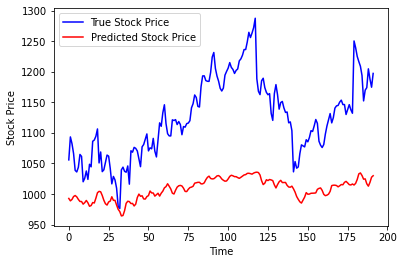

In [183]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

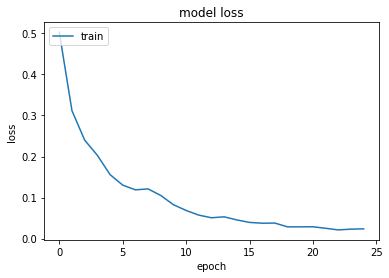

In [184]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Tuning the no of epochs

## Increasing the epochs.

In [185]:
model = Sequential()
model.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/30
35/35 - 5s - loss: 0.3517 - accuracy: 9.1827e-04 - val_loss: 1266395.7500 - val_accuracy: 0.0000e+00 - 5s/epoch - 156ms/step
Epoch 2/30
35/35 - 2s - loss: 0.2171 - accuracy: 0.0018 - val_loss: 1266540.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 57ms/step
Epoch 3/30
35/35 - 2s - loss: 0.1746 - accuracy: 0.0018 - val_loss: 1266009.3750 - val_accuracy: 0.0000e+00 - 2s/epoch - 57ms/step
Epoch 4/30
35/35 - 2s - loss: 0.1354 - accuracy: 0.0018 - val_loss: 1265907.8750 - val_accuracy: 0.0000e+00 - 2s/epoch - 58ms/step
Epoch 5/30
35/35 - 2s - loss: 0.1090 - accuracy: 9.1827e-04 - val_loss: 1266068.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 57ms/step
Epoch 6/30
35/35 - 2s - loss: 0.0955 - accuracy: 0.0018 - val_loss: 1265897.1250 - val_accuracy: 0.0000e+00 - 2s/epoch - 56ms/step
Epoch 7/30
35/35 - 2s - loss: 0.0987 - accuracy: 9.1827e-04 - val_loss: 1265992.0000 - val_accuracy: 0.0000e+00 - 2s/epoch - 56ms/step
Epoch 8/30
35/35 - 2s - loss: 0.0758 - accuracy: 9.1827e-04 - val_loss

In [186]:
y_pred = model.predict(X_test)

In [187]:
predicted_price = sc.inverse_transform(y_pred)

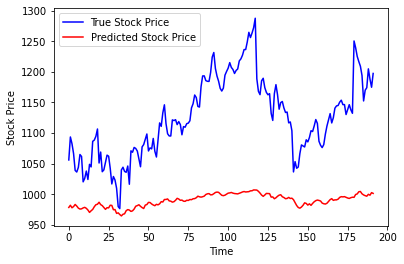

In [188]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

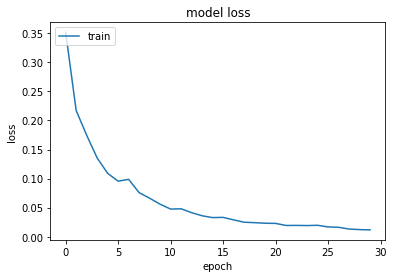

In [189]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Decreasing the no. of epochs  

In [190]:
model = Sequential()
model.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/15
35/35 - 5s - loss: 0.4286 - accuracy: 0.0018 - val_loss: 1266418.3750 - val_accuracy: 0.0000e+00 - 5s/epoch - 153ms/step
Epoch 2/15
35/35 - 2s - loss: 0.2864 - accuracy: 9.1827e-04 - val_loss: 1265498.1250 - val_accuracy: 0.0000e+00 - 2s/epoch - 56ms/step
Epoch 3/15
35/35 - 2s - loss: 0.1876 - accuracy: 9.1827e-04 - val_loss: 1266209.0000 - val_accuracy: 0.0000e+00 - 2s/epoch - 56ms/step
Epoch 4/15
35/35 - 2s - loss: 0.1524 - accuracy: 0.0018 - val_loss: 1266074.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 56ms/step
Epoch 5/15
35/35 - 2s - loss: 0.1473 - accuracy: 0.0018 - val_loss: 1266483.8750 - val_accuracy: 0.0000e+00 - 2s/epoch - 58ms/step
Epoch 6/15
35/35 - 2s - loss: 0.1430 - accuracy: 0.0018 - val_loss: 1265463.8750 - val_accuracy: 0.0000e+00 - 2s/epoch - 58ms/step
Epoch 7/15
35/35 - 2s - loss: 0.0971 - accuracy: 0.0018 - val_loss: 1266180.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 57ms/step
Epoch 8/15
35/35 - 2s - loss: 0.1106 - accuracy: 0.0018 - val_loss: 126618

In [191]:
y_pred = model.predict(X_test)

In [192]:
predicted_price = sc.inverse_transform(y_pred)

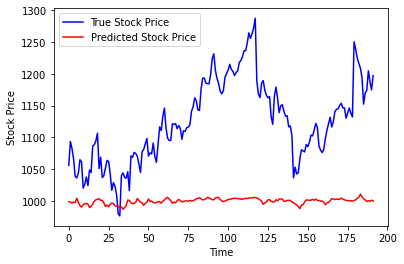

In [193]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

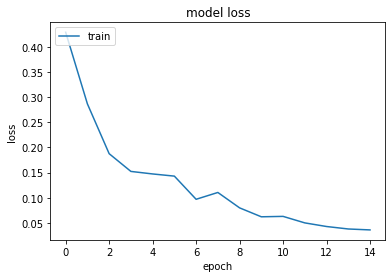

In [194]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Changing the no of nodes in layers:

## Increasing the no of nodes.

In [195]:
model = Sequential()
model.add(SimpleRNN(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=100,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=100))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 7s - loss: 0.4624 - accuracy: 9.1827e-04 - val_loss: 1266464.6250 - val_accuracy: 0.0000e+00 - 7s/epoch - 196ms/step
Epoch 2/25
35/35 - 3s - loss: 0.3172 - accuracy: 0.0018 - val_loss: 1266971.3750 - val_accuracy: 0.0000e+00 - 3s/epoch - 87ms/step
Epoch 3/25
35/35 - 3s - loss: 0.3527 - accuracy: 9.1827e-04 - val_loss: 1266726.3750 - val_accuracy: 0.0000e+00 - 3s/epoch - 86ms/step
Epoch 4/25
35/35 - 3s - loss: 0.3114 - accuracy: 0.0000e+00 - val_loss: 1266181.2500 - val_accuracy: 0.0000e+00 - 3s/epoch - 85ms/step
Epoch 5/25
35/35 - 3s - loss: 0.2224 - accuracy: 0.0018 - val_loss: 1265978.1250 - val_accuracy: 0.0000e+00 - 3s/epoch - 86ms/step
Epoch 6/25
35/35 - 3s - loss: 0.1891 - accuracy: 0.0018 - val_loss: 1266010.8750 - val_accuracy: 0.0000e+00 - 3s/epoch - 86ms/step
Epoch 7/25
35/35 - 3s - loss: 0.1532 - accuracy: 0.0018 - val_loss: 1266213.5000 - val_accuracy: 0.0000e+00 - 3s/epoch - 85ms/step
Epoch 8/25
35/35 - 3s - loss: 0.1463 - accuracy: 9.1827e-04 - val_loss

In [196]:
y_pred = model.predict(X_test)

In [197]:
predicted_price = sc.inverse_transform(y_pred)

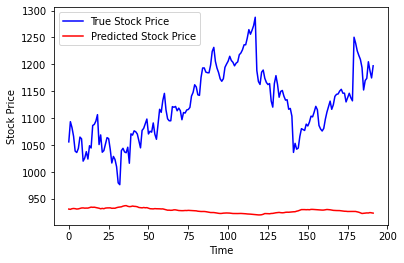

In [198]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

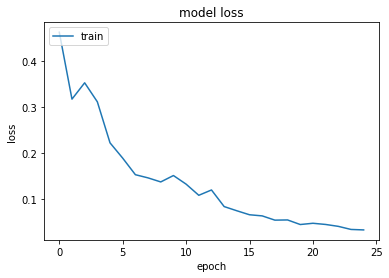

In [199]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Decreasing the no of nodes.

In [200]:
model = Sequential()
model.add(SimpleRNN(units=25,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=25,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=25,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=25))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 5s - loss: 0.4558 - accuracy: 0.0018 - val_loss: 1265806.6250 - val_accuracy: 0.0000e+00 - 5s/epoch - 148ms/step
Epoch 2/25
35/35 - 2s - loss: 0.2785 - accuracy: 0.0018 - val_loss: 1266164.8750 - val_accuracy: 0.0000e+00 - 2s/epoch - 48ms/step
Epoch 3/25
35/35 - 2s - loss: 0.2115 - accuracy: 9.1827e-04 - val_loss: 1266006.3750 - val_accuracy: 0.0000e+00 - 2s/epoch - 48ms/step
Epoch 4/25
35/35 - 2s - loss: 0.1555 - accuracy: 0.0018 - val_loss: 1266100.5000 - val_accuracy: 0.0000e+00 - 2s/epoch - 46ms/step
Epoch 5/25
35/35 - 2s - loss: 0.1563 - accuracy: 9.1827e-04 - val_loss: 1265979.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 48ms/step
Epoch 6/25
35/35 - 2s - loss: 0.1178 - accuracy: 0.0018 - val_loss: 1265724.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 46ms/step
Epoch 7/25
35/35 - 2s - loss: 0.0981 - accuracy: 9.1827e-04 - val_loss: 1265768.1250 - val_accuracy: 0.0000e+00 - 2s/epoch - 46ms/step
Epoch 8/25
35/35 - 2s - loss: 0.0871 - accuracy: 0.0018 - val_loss: 12

In [201]:
y_pred = model.predict(X_test)

In [202]:
predicted_price = sc.inverse_transform(y_pred)

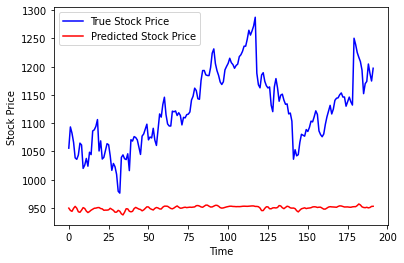

In [203]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

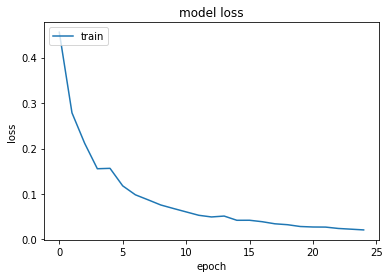

In [204]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Changing the no of layers:

## Increasing the no of layers.

In [205]:
model = Sequential()
model.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 8s - loss: 0.5182 - accuracy: 0.0018 - val_loss: 1265484.1250 - val_accuracy: 0.0000e+00 - 8s/epoch - 220ms/step
Epoch 2/25
35/35 - 3s - loss: 0.3199 - accuracy: 0.0018 - val_loss: 1266335.6250 - val_accuracy: 0.0000e+00 - 3s/epoch - 72ms/step
Epoch 3/25
35/35 - 2s - loss: 0.2524 - accuracy: 0.0018 - val_loss: 1265707.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 71ms/step
Epoch 4/25
35/35 - 2s - loss: 0.2220 - accuracy: 0.0018 - val_loss: 1265844.1250 - val_accuracy: 0.0000e+00 - 2s/epoch - 71ms/step
Epoch 5/25
35/35 - 2s - loss: 0.1710 - accuracy: 0.0018 - val_loss: 1265805.6250 - val_accuracy: 0.0000e+00 - 2s/epoch - 71ms/step
Epoch 6/25
35/35 - 2s - loss: 0.1622 - accuracy: 9.1827e-04 - val_loss: 1265689.7500 - val_accuracy: 0.0000e+00 - 2s/epoch - 71ms/step
Epoch 7/25
35/35 - 2s - loss: 0.1386 - accuracy: 0.0018 - val_loss: 1265224.5000 - val_accuracy: 0.0000e+00 - 2s/epoch - 71ms/step
Epoch 8/25
35/35 - 2s - loss: 0.1208 - accuracy: 9.1827e-04 - val_loss: 126571

In [206]:
y_pred = model.predict(X_test)

In [207]:
predicted_price = sc.inverse_transform(y_pred)

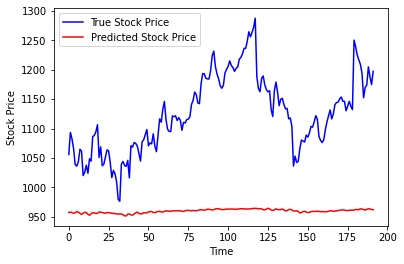

In [208]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

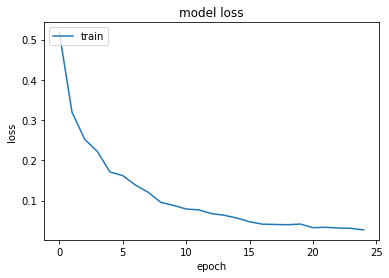

In [209]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

## Decreasing the no of layers.

In [210]:
model = Sequential()
model.add(SimpleRNN(units=50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
hist=model.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),shuffle=True,batch_size=32, verbose=2)

Epoch 1/25
35/35 - 4s - loss: 0.2966 - accuracy: 0.0000e+00 - val_loss: 1265415.1250 - val_accuracy: 0.0000e+00 - 4s/epoch - 116ms/step
Epoch 2/25
35/35 - 1s - loss: 0.1563 - accuracy: 9.1827e-04 - val_loss: 1266067.8750 - val_accuracy: 0.0000e+00 - 1s/epoch - 41ms/step
Epoch 3/25
35/35 - 1s - loss: 0.1132 - accuracy: 0.0018 - val_loss: 1265966.2500 - val_accuracy: 0.0000e+00 - 1s/epoch - 41ms/step
Epoch 4/25
35/35 - 1s - loss: 0.0950 - accuracy: 0.0018 - val_loss: 1265707.3750 - val_accuracy: 0.0000e+00 - 1s/epoch - 41ms/step
Epoch 5/25
35/35 - 1s - loss: 0.0604 - accuracy: 0.0018 - val_loss: 1265459.2500 - val_accuracy: 0.0000e+00 - 1s/epoch - 41ms/step
Epoch 6/25
35/35 - 1s - loss: 0.0471 - accuracy: 0.0018 - val_loss: 1265379.5000 - val_accuracy: 0.0000e+00 - 1s/epoch - 42ms/step
Epoch 7/25
35/35 - 1s - loss: 0.0408 - accuracy: 0.0018 - val_loss: 1265763.8750 - val_accuracy: 0.0000e+00 - 1s/epoch - 42ms/step
Epoch 8/25
35/35 - 1s - loss: 0.0353 - accuracy: 0.0018 - val_loss: 126536

In [211]:
y_pred = model.predict(X_test)

In [212]:
predicted_price = sc.inverse_transform(y_pred)

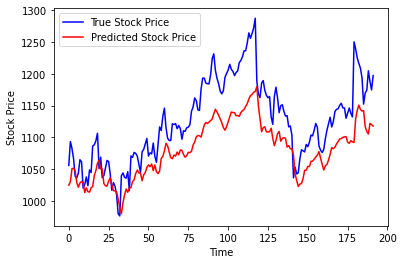

In [213]:
plt.plot(y_test, color = 'blue', label = 'True Stock Price')
plt.plot(predicted_price, color = 'red', label = 'Predicted Stock Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

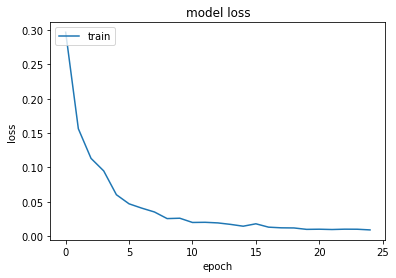

In [214]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()